## Universidad Politécnica Salesiana
#### Edith Guaraca C.
#### Simulación

# Juego de la vida

El juego de la vida es un autómata celular diseñado por el matemático británico John Horton Conway en 1970.

Se trata de un juego de cero jugadores, lo que quiere decir que su evolución está determinada por el estado inicial y no necesita ninguna entrada de datos posterior. El "tablero de juego" es una malla plana formada por cuadrados (las "células") que se extiende por el infinito en todas las direcciones. Por tanto, cada célula tiene 8 células "vecinas", que son las que están próximas a ella, incluidas las diagonales. Las células tienen dos estados: están "vivas" o "muertas" (o "encendidas" y "apagadas"). El estado de las células evoluciona a lo largo de unidades de tiempo discretas (se podría decir que por turnos). El estado de todas las células se tiene en cuenta para calcular el estado de las mismas al turno siguiente. Todas las células se actualizan simultáneamente en cada turno, siguiendo estas reglas:

* Una célula muerta con exactamente 3 células vecinas vivas "nace" (es decir, al turno siguiente estará viva).
* Una célula viva con 2 o 3 células vecinas vivas sigue viva, en otro caso muere (por "soledad" o "superpoblación").

## Implementacion

In [55]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

In [56]:
def vecinos(mat): 
    n = len(mat) 
    ex = np.zeros((n+2,n+2)) 
    ex[1:n+1,1:n+1] = mat 
    return ex

In [57]:
def vecinos1(i,j, ex): 
    return (ex[i,j-1] + ex[i,j+1] + ex[i-1,j-1] + (ex[i-1,j] + ex[i-1,j+1] + ex[i+1,j-1]) + (ex[i+1,j]+ ex[i+1,j+1]))


In [58]:
def reglas(mat): 
    n = len(mat) 
    ex = vecinos(mat) 
    nmat = np.zeros((n,n)) 
    for i in range(1,n+1): 
        for j in range(1,n+1): 
            s = vecinos1(i,j,ex) 
            if s>3 or s <=1: 
                nmat[i-1,j-1] = 0 
            if s == 3 and mat[i-1,j-1]== 0: 
                nmat[i-1,j-1] = 1 
            if (s == 3 or s== 2) and mat[i-1,j-1]== 1: 
                nmat[i-1,j-1] = 1 
    return nmat

In [59]:
def cambios(n,ini): 
    pasos = [] 
    pasos.append(ini) 
    g = ini 
    for i in range(n): 
        g = reglas(g) 
        pasos.append(g) 
    return pasos

In [60]:
init = np.zeros((34,34)) 
init[8,5] = 1 
init[8,6] = 1 
init[8,7] = 1 
init[8,8] = 1 
init[8,9] = 1 
init[8,11] = 1 
init[8,12] = 1 
init[8,13] = 1 
init[8,14] = 1 
init[8,15] = 1


In [61]:
# declaramos 5 iteraciones

res = cambios(5, init)

In [62]:
print (res[5]) 
print (len(res[5]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
34


In [63]:


def grafmat(mt): 
    n = len(mt) 
    dx = 1/n 
    pieces = [] 
    frame = patches.Rectangle( 
        (0.0, 0.0),1, 1, fill=False, edgecolor="white",linewidth=2) 
    pieces.append(frame) 
    for j in range(n): 
        for i in range(n): 
            if mt[i,j]== 1: 
                p = patches.Rectangle( 
                    (j/n,(n-1-i)/n), dx,dx, edgecolor="Gray", facecolor="black", fill=True, linewidth=2 )
                pieces.append(p) 
            if mt[i,j]== 0:
                p = patches.Rectangle( 
                    (j/n,(n-1-i)/n), dx,dx, edgecolor="Gray", fill=False,linewidth=2) 
                pieces.append(p) 
    return pieces


In [64]:
 def ver(x): 
        ax1=plt.subplot(111,aspect='equal') 
        shape = grafmat(x) 
        for p in shape: ax1.add_patch(p) 
        plt.axis('off') 
        plt.show()


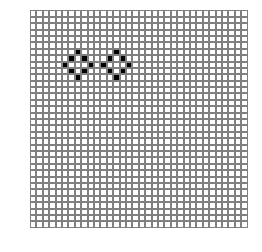

In [65]:
ver (res[2])

In [66]:
def vista5(v,w,x, y, z): 
    fg = plt.figure(figsize=(20,4)) 
    adj = plt.subplots_adjust(hspace=0.4)
    
    ax0=plt.subplot(151,aspect='equal') 
    shape = grafmat(v) 
    for p in shape: ax0.add_patch(p) 
    plt.axis('off')
    
    ax1=plt.subplot(152,aspect='equal') 
    shape = grafmat(w) 
    for p in shape: ax1.add_patch(p) 
    plt.axis('off')
    
    ax2=plt.subplot(153,aspect='equal')  
    shape = grafmat(x) 
    for p in shape: ax2.add_patch(p) 
    plt.axis('off')
    
    ax3=plt.subplot(154,aspect='equal') 
    shape = grafmat(y) 
    for p in shape: ax3.add_patch(p) 
    plt.axis('off')
    
    ax4=plt.subplot(155,aspect='equal') 
    shape = grafmat(z) 
    for p in shape: ax4.add_patch(p) 
    plt.axis('off')
    plt.show()



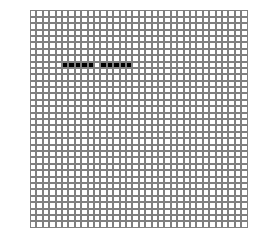

In [67]:
cor= cambios(46, init)
ver(init)

In [68]:
 def base(): 
        Base = np.zeros((34,34)) 
        Base[11,10] = 1 
        Base[11,16] = 1 
        Base[11,20] = 1 
        Base[13,12] = 1 
        Base[16,16] = 1 
        Base[16,20] = 1 
        Base[20,12] = 1 
        Base[20,16] = 1 
        Base[20,20] = 1 
        return Base


In [69]:
m10 = base() 
m10[13,12] = 1 
m10[14,12] = 1 
m10[15,12] = 1 
m10[13,13] = 1 
m10[14,14] = 1 
m10[15,15] = 1 
m10[17,16] = 1 
m10[18,16] = 1 
m10[19,16] = 1

m11 = base() 
m11[15,13] = 1 
m11[14,14] = 1 
m11[13,15] = 1 
m11[13,17] = 1 
m11[14,18] = 1 
m11[15,19] = 1 
m11[16,17] = 1 
m11[16,18] = 1 
m11[16,19] = 1

m12 = base() 
m12[13,13] = 1 
m12[14,14] = 1 
m12[15,15] = 1 
m12[17,15] = 1 
m12[18,14] = 1 
m12[19,13] = 1 
m12[17,12] = 1 
m12[18,12] = 1 
m12[19,12] = 1

m13 = base() 
m13[13,16] = 1 
m13[14,16] = 1 
m13[15,16] = 1 
m13[17,16] = 1 
m13[18,16] = 1 
m13[19,16] = 1 
m13[19,17] = 1 
m13[18,18] = 1 
m13[17,19] = 1

m14 = base() 
m14[13,13] = 1 
m14[14,14] = 1 
m14[15,15] = 1 
m14[16,13] = 1 
m14[16,14] = 1 
m14[16,15] = 1 
m14[17,12] = 1 
m14[18,12] = 1 
m14[19,12] = 1

m15 = base() 
m15[16,17] = 1 
m15[16,18] = 1
m15[16,19] = 1 
m15[17,17] = 1 
m15[18,18] = 1 
m15[19,19] = 1 
m15[20,17] = 1 
m15[20,18] = 1 
m15[20,19] = 1


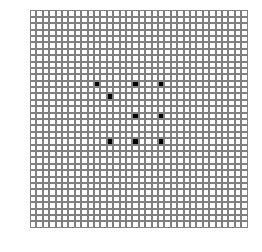

In [70]:
ver (base())

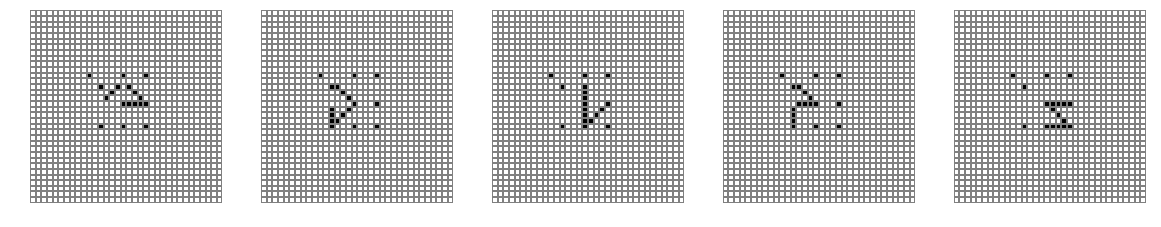

In [71]:
vista5 (m11,m12,m13,m14,m15)

Iteraciones


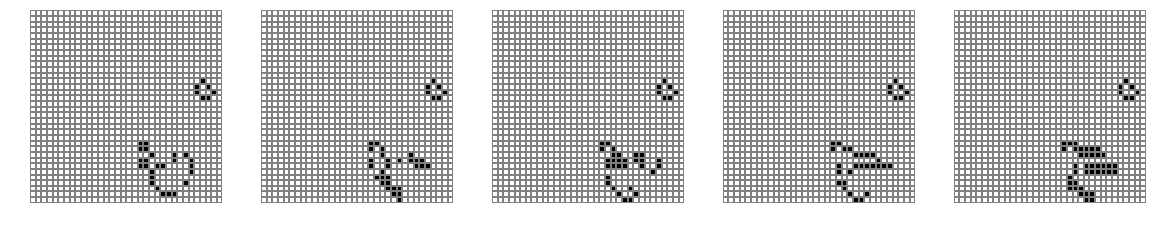

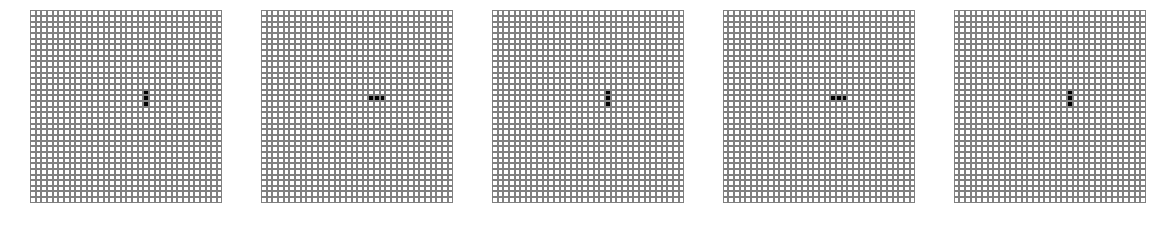

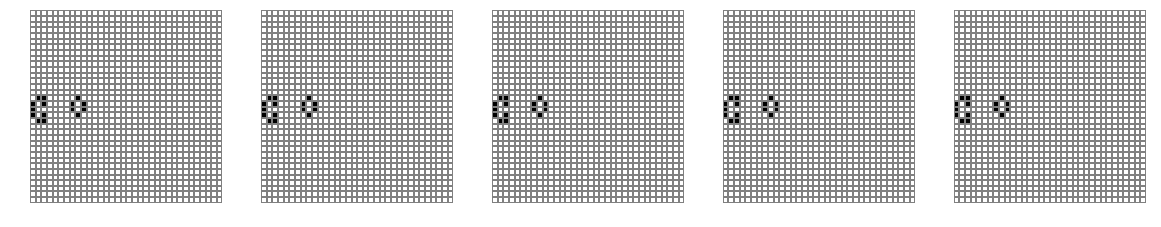

In [ ]:
muestras = [m10,m11,m12,m13,m14,m15] 
resultados = []
for m in muestras: 
    r = cambios(300, m) 
    resultados.append(r)
    
 
print("Iteraciones")

i = 1 
for r in resultados: 
    vista5 (r[len(r)-5],r[len(r)-4],r[len(r)-3],r[len(r)-2],r[len(r)-1]) 
                                                                                                                                        
    i = i + 1



In [ ]:
import simpy 
import random 
import matplotlib.pyplot as pp

dms={} 
dm={} 
j = 0 
for r in resultados: 
    j = j + 1 
    i = 0 
    for m in r: 
        i = i + 1 
        for fila in range(len(m)): 
            for columna in range(len(m)): 
                if m[fila][columna] == 1: 
                    if i in dm: 
                        dm[i]=dm[i]+1 
                    else: 
                        dm[i]=1
dms[j]=dm 
dm={}

# Generamos la grafica 
for key, dicm in dms.items(): 
    print ("Muestra ", key) 
    ver (muestras[key-1])  
    datos=sorted(dicm.items()) 
    x, y =zip(*datos) 
    pp.plot(x,y,linewidth=2,color='red') 
    pp.scatter(x,y,color='blue') 
    pp.grid(True) 
    pp.title("Muestra %s" %(key)) 
    pp.xlabel('Interacciones') 
    pp.ylabel('Celulas Vivas')
    pp.show()
    